# Rising Food Prices and Poverty in Latin America and the Caribbean:
## Effect of Ukrainian invasion


In [2]:
%%capture
%matplotlib inline
from scldata_simulation import * 

In [4]:
povertyline = "Data Projects/International Poverty Lines/international_poverty_lines.csv"
pl          = pd.read_csv(f'{scldatalake}/{povertyline}')

# Reshape long to wide 
index = ['year','isoalpha3']
pl = pl.pivot_table(index = index, columns = 'indicator', values = 'value').reset_index()
pl = pl.reset_index()
pl = pl.drop(columns = ['ppp_wdi2011'])
pl = pl.rename(columns = {'isoalpha3':'code'})

# CPI 2011 = 100
pl['cpi_2011' ] = [pl[(pl.code == x) & (pl.year == 2011)].cpi.item() for x in pl.code]

# Rename variables for merge 
pl.rename(columns = {'code':'pais_c', 'year':'anio_c'}, inplace = True)
pl.head()

indicator,index,anio_c,pais_c,cpi,cpi_2011,lp19_2011,lp31_2011,lp5_2011,ppp_2011,tc_wdi
0,0,1989,ARG,0.745,71.430,1.905,3.108,5.013,3.161,0.042
1,1,1989,BHS,56.138,96.546,37.812,61.693,99.506,1.125,1.000
2,2,1989,BLZ,60.460,95.642,42.891,69.979,112.870,1.174,2.000
3,3,1989,BOL,15.855,76.640,34.564,56.394,90.959,2.891,2.692
4,4,1989,BRA,6011358.878,21900000000000.000,0.000,0.000,0.000,1.651,0.000


In [13]:
povertyline = "Data Projects/International Poverty Lines/International_Poverty_Lines_LAC.csv"
pl          = pd.read_csv(f'{scldatalake}/{povertyline}')

# Reshape long to wide 
index = ['year','isoalpha3']
pl = pl.pivot_table(index = index, columns = 'indicator', values = 'value').reset_index()
pl = pl.reset_index()
pl = pl.drop(columns = ['ppp_wdi2011'])
pl = pl.rename(columns = {'isoalpha3':'code'})

# CPI 2011 = 100
pl['cpi_2011' ] = [pl[(pl.code == x) & (pl.year == 2011)].cpi.item() for x in pl.code]

# Rename variables for merge 
pl.rename(columns = {'code':'pais_c', 'year':'anio_c'}, inplace = True)
pl.head()

indicator,index,anio_c,pais_c,cpi,cpi_2011,lp19_2011,lp31_2011,lp5_2011,ppp_2011,tc_wdi
0,0,1989,ARG,0.745,71.430,1.905,3.108,5.013,3.161,0.042
1,1,1989,BHS,56.138,96.546,37.812,61.693,99.506,1.125,1.000
2,2,1989,BLZ,60.460,95.642,42.891,69.979,112.870,1.174,2.000
3,3,1989,BOL,15.855,76.640,34.564,56.394,90.959,2.891,2.692
4,4,1989,BRA,6011358.878,21884097039589.602,0.000,0.000,0.000,1.651,0.000


In [17]:
pl[pl.pais_c=='CRI'].tail(6)

indicator,index,anio_c,pais_c,cpi,cpi_2011,lp19_2011,lp31_2011,lp5_2011,ppp_2011,tc_wdi
710,710,2016,CRI,92.954,80.248,23390.018,38162.660,61552.676,349.407,544.739
736,736,2017,CRI,94.465,80.248,23770.230,38783.008,62553.234,349.407,567.513
762,762,2018,CRI,96.562,80.248,24297.898,39643.938,63941.836,349.407,576.972
788,788,2019,CRI,98.588,80.248,24807.701,40475.723,65283.422,349.407,587.295
814,814,2020,CRI,99.302,80.248,24987.365,40768.859,65756.227,349.407,584.901
840,840,2021,CRI,100.636,80.248,25323.039,41316.539,66639.578,349.407,620.785


In [2]:
# Instantiate simulator 
scldata_simulation = SCLdataSimulation()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# price shock components 
# - You can choose which components are affected by exogenous impact 
shock_component = ['Alimentos fuera del hogar',
                   'Azúcares', 'Bebidas no alcohólicas',
                   #'Carnes, aves y huevos',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales'
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]

# shock_weight
# - pct impact of exogenous impact
shock_weight = 0.10

# population affected - shock_weight
# - specify whether the impact is focused on a subgroup of the population
# self-employed or independent workers in the agricultural sector will not be impacted by the Shock
shock_population = {'sec_agri': 0}

# income_growth 
# - Control by GDP growth
#gdp_growth = 0.024

In [2]:
#scldata_simulation.get_poverty_lines(shock_component)

In [4]:
# Get the growth by country
scldata_simulation.get_gdp_growth(year='2022').sort_values('gdp_change', ascending=False).head(5)

,pais_c,gdp_change
17,GUY,0.487
27,LCA,0.131
26,KNA,0.100
4,BRB,0.085
28,VCT,0.083


In [5]:
change = scldata_simulation.simulate_shock(shock_component, shock_weight, shock_population,
                                           gdp_growth_population='', year='2022')

## Deltas by Country

In [17]:
#country_group = scldata_simulation.country_results(change)
country_group.columns

Index(['anio_c', 'pais_c', 'population', 'poor_int_pop', 'poor_int_delta_pop',
       'poor31_int_pop', 'poor31_int_delta_pop', 'poor_national_pop',
       'poor_national_delta_pop', 'poor_e_national_pop',
       'poor_e_national_delta_pop', 'poor_national_new_recovery',
       'poor_e_national_new_recovery', 'poor_int', 'poor_int_delta',
       'poor31_int', 'poor31_int_delta', 'poor_national',
       'poor_national_delta', 'poor_e_national', 'poor_e_national_delta'],
      dtype='object')

In [20]:
#country_group[['pais_c', 'poor_national_new_recovery']].sort_values('poor_national_new_recovery')

<Figure size 1200x800 with 0 Axes>

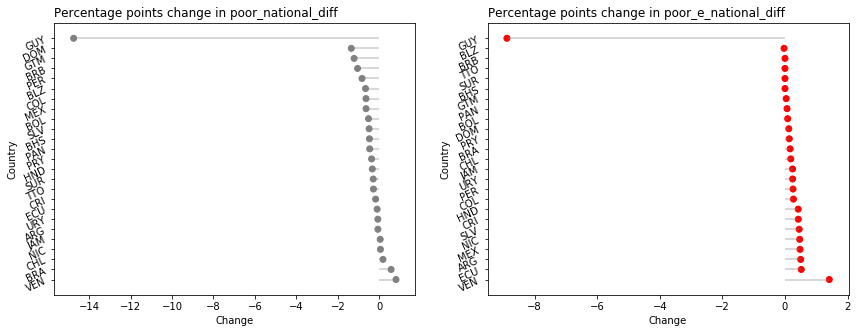

In [21]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
variables = ['poor_national', 'poor_e_national']
for variable in variables:
    country_group[variable +'_diff'] = (country_group[variable + '_delta'] - country_group[variable])*100  
variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])
country_group_melt = pd.melt(country_group[variables],id_vars=['anio_c', 'pais_c'],var_name='metrics', value_name='values')

country_group_melt['color'] = np.where(country_group_melt['metrics']=='poor_national_diff', 'grey', 'red')

# Figure by poverty level 
plt.figure(figsize = (22,5))

for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = country_group_melt[country_group_melt.metrics==variable]
    ordered_df = ordered_df.sort_values(by=['values'], ascending=False)
    # Subplot
    plt.subplot(1,3,i+1)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y = my_range, xmin=0, 
               xmax = ordered_df['values'], 
               color ='grey', alpha=0.4)
    plt.scatter(ordered_df['values'], my_range, color=ordered_df.color, alpha=1) 
    plt.yticks(my_range, ordered_df['pais_c'])
    plt.title("Percentage points change in {0}".format(variable), loc='left')
    plt.xlabel('Change')
    plt.ylabel('Country')
    plt.yticks(rotation = 25)
    
plt.show()

## Distribution of poverty rate changes in percentual points by country

Simulate impacts using a vector of scenarios to evaluate distributions.

#### Simulations for App

In [ ]:
# ToDo(rsanchezavalos): Concat everything into one file 
shock_component = ['Granos',
                   'Panes y\ncereales']

shock_weights = [i/100 for i in range(0,60,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population, gdp_growth_population='', year='2022')
simulations_concat['shock_component'] = ''.join(shock_component)
simulations_concat.to_csv('../data/simulations_concat.csv', index=False)

shock_component = ['Granos']
shock_weights = [i/100 for i in range(0,60,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population, gdp_growth_population='', year='2022')
simulations_concat['shock_component'] = ''.join(shock_component)
simulations_concat.to_csv('../data/simulations_concat_Granos.csv', index=False)

shock_component = ['Alimentos fuera del hogar',
                   'Bebidas no alcohólicas',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales',
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]
shock_weights = [i/100 for i in range(0,60,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population, gdp_growth_population='', year='2022')
simulations_concat['shock_component'] = ''.join(shock_component)
simulations_concat.to_csv('../data/simulations_concat_all_no_meat.csv', index=False)

shock_component = ['Alimentos fuera del hogar',
                   'Azúcares', 'Bebidas no alcohólicas',
                   'Carnes, aves y huevos',
                   'Frutas', 
                   'Granos',
                   'Panes y\ncereales',
                   'Grasas', 
                   'Leguminosas',
                   'Lácteos', 
                   'Productos no especificados previamente',
                   'Raíces y\ntubérculos', 'Vegetales'
                  ]
shock_weights = [i/100 for i in range(0,60,10) ]
simulations_concat = scldata_simulation.simulate_changes(shock_component, shock_weights, shock_population, gdp_growth_population='', year='2022')
simulations_concat['shock_component'] = ''.join(shock_component)
simulations_concat.to_csv('../data/simulations_concat_all.csv', index=False)

### Plot distribution

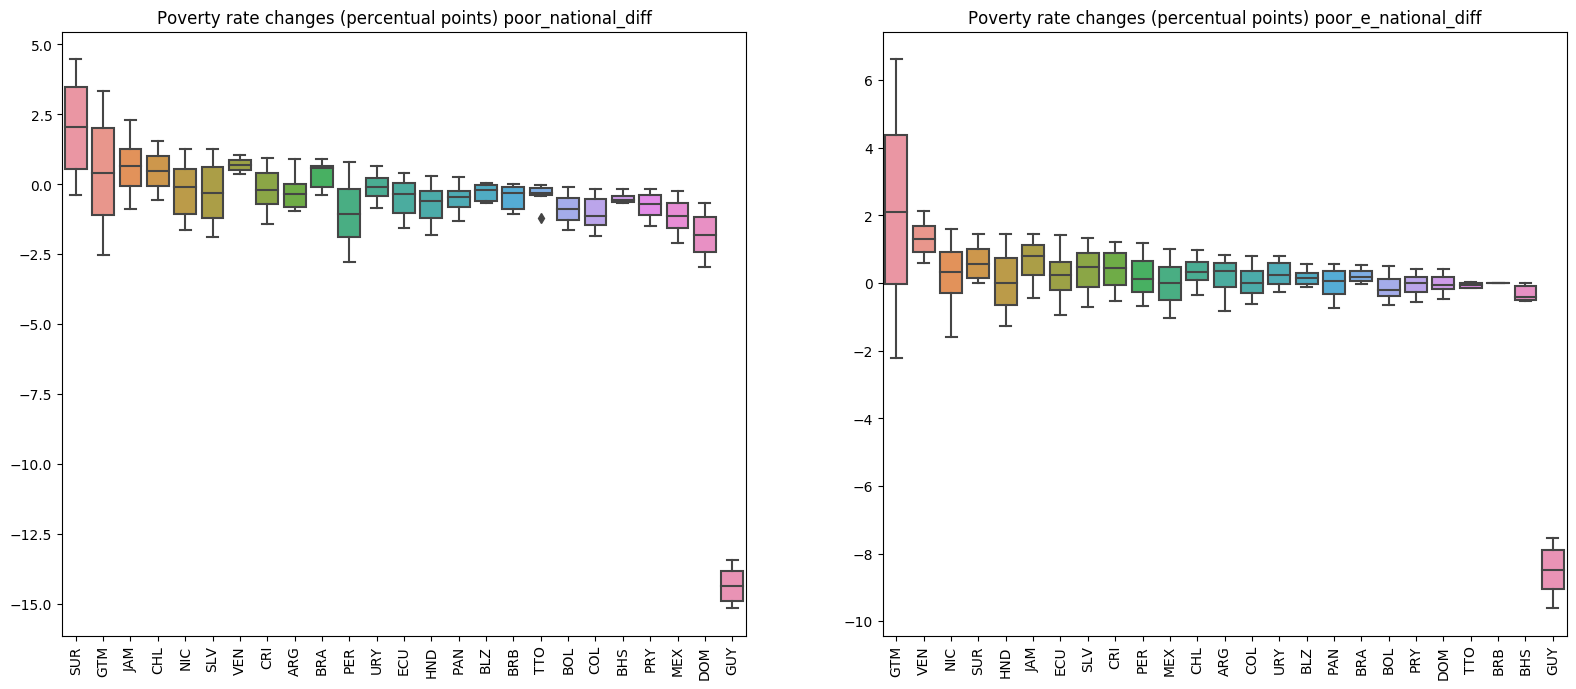

In [18]:
fig=plt.figure(figsize=(30,8), dpi= 100, facecolor='w', edgecolor='k')

variables = ['poor_national', 'poor_e_national']
for variable in variables:
    simulations_concat[variable +'_diff'] = (simulations_concat[variable + '_delta'] - simulations_concat[variable])*100  

variables = [x + '_diff' for x in variables]
variables.extend(['anio_c', 'pais_c'])

simulations_melt = pd.melt(simulations_concat[variables],id_vars=['anio_c', 'pais_c'],
                           var_name='metrics',
                           value_name='values')
simulations_melt['color'] = np.where(simulations_melt['metrics']=='poor_national_diff', 'grey', 'red')



for i,variable in enumerate(['poor_national_diff', 'poor_e_national_diff']):
    ordered_df = simulations_melt[simulations_melt.metrics==variable]
    #ordered_df = ordered_df.sort_values(by=[ 'pais_c'], ascending=False)
    ordered_df = ordered_df.sort_values(by=[ 'values'], ascending=False)
    
    # Subplot
    plt.subplot(1,3,i+1)
    #plt.figure(figsize = (9,5))
    my_range=range(1, len(ordered_df.index)+1 )
    
    # Distribution in changes in PL
    ax = sns.boxplot(x = 'pais_c', y = 'values', data = ordered_df)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Poverty rate changes (percentual points) ' + variable)
    ax.tick_params(axis='x', rotation=90)

plt.show()